Mutual Information - Regression Problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=50, n_features=5)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,0.845611,-0.926663,-0.489022,-1.361968,-1.159006
1,-1.176148,0.492163,-0.302712,-1.145655,-2.375888
2,-1.087991,-0.762900,-2.079494,-0.950013,0.532876
3,0.611529,-0.901048,-1.277283,-1.211285,0.540038
4,1.142011,1.210876,0.491877,-0.109093,0.497155


In [6]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

In [8]:
fs = SelectKBest(score_func= mutual_info_regression, k=3)
fs.fit(x,y)

SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x000001FE54C75F80>)

In [9]:
fs.scores_

array([0.21672806, 0.12765575, 0.00157466, 0.        , 0.62884766])

In [11]:
mi_score = pd.Series(fs.scores_, index= x.columns)
mi_score

0    0.216728
1    0.127656
2    0.001575
3    0.000000
4    0.628848
dtype: float64

<Axes: >

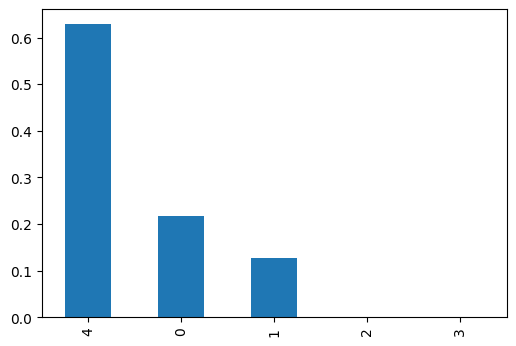

In [12]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [14]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)
x_selected.head()

,0,1,2
0,0.845611,-0.926663,-1.159006
1,-1.176148,0.492163,-2.375888
2,-1.087991,-0.762900,0.532876
3,0.611529,-0.901048,0.540038
4,1.142011,1.210876,0.497155


Mutual Information - classification Problem

In [15]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [17]:
x,y = make_classification(n_samples=50, n_features=5, n_informative=2)
x = pd.DataFrame(x)

In [18]:
x.head()

,0,1,2,3,4
0,2.782128,-1.750996,-2.877993,-2.065831,1.023547
1,-1.127380,0.677987,0.873715,0.266978,-0.148684
2,1.683564,-1.088924,-2.013499,-0.739846,0.866737
3,0.957139,-0.399169,0.893760,-0.247224,-1.361519
4,1.562766,-0.670064,1.289441,-0.650191,-2.068521


<Axes: >

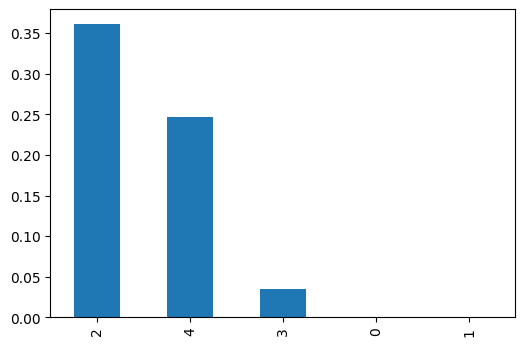

In [20]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(x,y)
mi_score= pd.Series(fs.scores_, index=x.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [21]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)
x_selected.head()

,0,1,2
0,-2.877993,-2.065831,1.023547
1,0.873715,0.266978,-0.148684
2,-2.013499,-0.739846,0.866737
3,0.893760,-0.247224,-1.361519
4,1.289441,-0.650191,-2.068521


Unsupervised Learning

Less variance columns will bw removed.
One of the highly correlated features will be removed.

In [22]:
import pandas as pd

data = pd.DataFrame({'Math':[70, 60, 40, 80, 30],
                    'Chemistry':[60, 80, 65, 55, 60],
                    'Maths':[70, 60, 40, 80, 30],
                    'Physics':[50, 50, 50, 50, 50],
                    'General_Test':[70, 70, 60, 60, 80]})

print(data)

   Math  Chemistry  Maths  Physics  General_Test
0    70         60     70       50            70
1    60         80     60       50            70
2    40         65     40       50            60
3    80         55     80       50            60
4    30         60     30       50            80


Variance

In [24]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)

selected_features = selector.fit_transform(data)
selected_features

data = pd.DataFrame(selected_features, columns=selector.get_feature_names_out())
data

,Math,Chemistry,Maths,General_Test
0,70,60,70,70
1,60,80,60,70
2,40,65,40,60
3,80,55,80,60
4,30,60,30,80


Correlation

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
cor = data.corr()
cor

,Math,Chemistry,Maths,General_Test
Math,1.000000,-0.150424,1.000000,-0.489932
Chemistry,-0.150424,1.000000,-0.150424,0.124274
Maths,1.000000,-0.150424,1.000000,-0.489932
General_Test,-0.489932,0.124274,-0.489932,1.000000


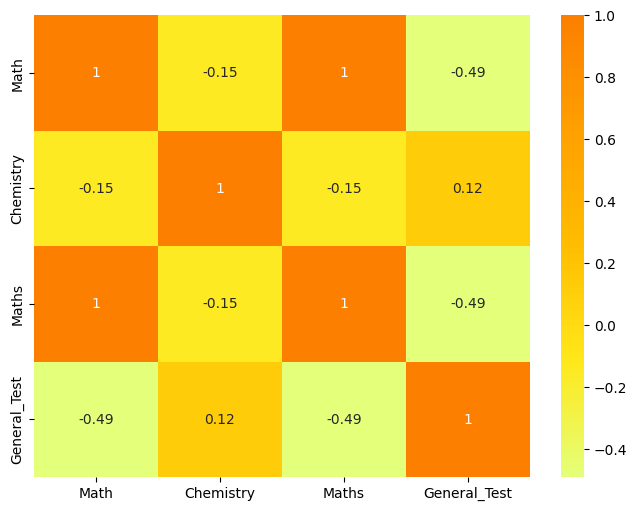

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='Wistia')
plt.show()

In [30]:
corr_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.9:
            colname = cor.columns[i]
            corr_features.add(colname)

In [31]:
corr_features

{'Maths'}

In [32]:
data = data.drop(corr_features, axis=1)
print(data)

   Math  Chemistry  General_Test
0    70         60            70
1    60         80            70
2    40         65            60
3    80         55            60
4    30         60            80
